Enter number of nodes:  4


Enter neighbors and weights for node 0 (e.g., [(1, 2), (3, 6)]):


 [(1,2),(2,4)]


Enter neighbors and weights for node 1 (e.g., [(1, 2), (3, 6)]):


 [(0,2),(3,5)]


Enter neighbors and weights for node 2 (e.g., [(1, 2), (3, 6)]):


 [(0,4),(3,9)]


Enter neighbors and weights for node 3 (e.g., [(1, 2), (3, 6)]):


 [(1,5),(2,9)]
Enter starting node:  0


Starting Prim's Algorithm from node 0...

Starting at node 0.
Adding edge (0 -> 1) with weight 2 to the MST.
Adding edge (0 -> 2) with weight 4 to the MST.
Adding edge (1 -> 3) with weight 5 to the MST.

Prim's Algorithm completed.
Total weight of MST: 11
MST edges: [(0, 1, 2), (0, 2, 4), (1, 3, 5)]


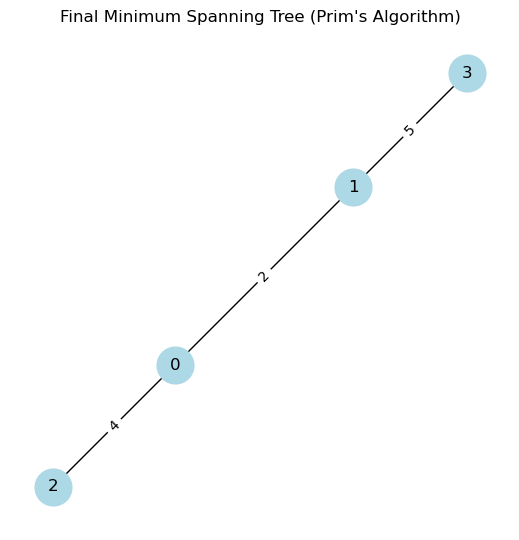


Minimum Spanning Tree: [(0, 1, 2), (0, 2, 4), (1, 3, 5)]
Total weight: 11


In [11]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

def prim_mst(graph, start):
    mst = []
    visited = [False] * len(graph)
    min_heap = [(0, start, -1)]  # (weight, current_node, parent)
    total_weight = 0

    G = nx.Graph()

    print(f"Starting Prim's Algorithm from node {start}...\n")

    while min_heap:
        weight, node, parent = heapq.heappop(min_heap)

        if visited[node]:
            continue

        visited[node] = True
        total_weight += weight

        if parent != -1:
            mst.append((parent, node, weight))
            print(f"Adding edge ({parent} -> {node}) with weight {weight} to the MST.")
            G.add_edge(parent, node, weight=weight)
        else:
            print(f"Starting at node {node}.")

        for neighbor, w in graph[node]:
            if not visited[neighbor]:
                heapq.heappush(min_heap, (w, neighbor, node))

    print("\nPrim's Algorithm completed.")
    print("Total weight of MST:", total_weight)
    print("MST edges:", mst)

    # Plot the final Minimum Spanning Tree
    pos = nx.spring_layout(G)
    plt.figure(figsize=(5, 5))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=12)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Final Minimum Spanning Tree (Prim's Algorithm)")
    plt.show()

    return mst, total_weight

if __name__ == "__main__":
    graph = {}
    n = int(input("Enter number of nodes: "))
    for i in range(n):
        print(f"Enter neighbors and weights for node {i} (e.g., [(1, 2), (3, 6)]):")
        neighbors = eval(input())
        graph[i] = neighbors
    start = int(input("Enter starting node: "))
    mst, total_weight = prim_mst(graph, start)
    print("\nMinimum Spanning Tree:", mst)
    print("Total weight:", total_weight)
